<a href="https://colab.research.google.com/github/nithinrk11/Feynn-Labs-Machine-Learning-Internship/blob/main/Project%202B/Geographic_Segmentation_on_the_Indian_EV_market_(for_Public_Charging_Stations_infrastructure).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geographic Segmentation on the Indian EV market. (for Public Charging Stations infrastructure)
The Datasets used here are:
* 'OperationalPC.csv'[link](https://www.kaggle.com/datasets/srinrealyf/india-ev-market-data?select=OperationalPC.csv) Dataset for the state wise total number of Operational Public Charging Stations from kaggle datasets.
* 'State/UTs-wise Current Sales of Electric Vehicles (EV)'[link](https://www.data.gov.in/resource/stateuts-wise-current-sales-electric-vehicles-ev-country-various-segments-reply-unstarred) For EV sales from data.gov.in.
* Both the datasets were based on VAHAN dashboard portal data.
---

###Installing Dependencies

In [ ]:
!pip install yellowbrick
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer


#Load the Datasets

In [ ]:
!git clone https://github.com/nithinrk11/Feynn-Labs-Machine-Learning-Internship.git
%cd Feynn-Labs-Machine-Learning-Internship

Cloning into 'Feynn-Labs-Machine-Learning-Internship'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 114 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 3.13 MiB | 9.74 MiB/s, done.
Resolving deltas: 100% (34/34), done.
/content/Feynn-Labs-Machine-Learning-Internship/Feynn-Labs-Machine-Learning-Internship


In [ ]:
df1 = pd.read_csv('/content/Feynn-Labs-Machine-Learning-Internship/Project 2B/Datasets/(State wise EV sales) RS_Session_256_AU_95_C.csv')

In [ ]:
df2 = pd.read_csv('/content/Feynn-Labs-Machine-Learning-Internship/Project 2B/Datasets/OperationalPC.csv')

In [ ]:
df1.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


* We already know that `Two Wheeler, Three Wheeler and 4 Wheeler` were the most `influential EV types` among the States across the Nation., therefore lets drop all other irrelevant columns and convert all `NaN` values to zero

### Data Preprocessing

In [ ]:
df1 = df1.drop(df1.columns[4:11], axis=1)
df1.fillna(0, inplace=True)

* Compare State Name from df1 and State/UT from df2 and display unique values

In [ ]:
# Find unique values in both columns
df1_states = set(df1['State Name'].unique())
df2_states = set(df2['State'].unique())

# Find unique values in df1 that are not in df2
unique_in_df1 = df1_states - df2_states
print("Unique states in df1 not in df2:", unique_in_df1)

# Find unique values in df2 that are not in df1
unique_in_df2 = df2_states - df1_states
print("Unique states in df2 not in df1:", unique_in_df2)

Unique states in df1 not in df2: {'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu', 'Puducherry', 'Mizoram', 'Grand Total', 'Andaman and Nicobar Island'}
Unique states in df2 not in df1: {'Pondicherry', 'Andaman & Nicobar', 'Madhya Pradesh', 'Andhra Pradesh', 'D&D and DNH', 'Telangana', 'Lakshadweep'}


* We can observe that the `Sales dataset` containes the states `i.e., 'Mizoram', 'Dadra and Nagar Haveli and Daman and Diu', 'Grand Total', 'Puducherry', 'Andaman and Nicobar Island', 'Ladakh'` has no data regarding `Public Charging Stations`.
*But we can also see that there are State names which are same but either one of them are abbrevated such as `Dadra and Nagar Haveli and Daman and Diu` and `D&D and DNH`where they contain information of operational PCS.

----
>Let us extract all of the availabe required data.

##Feature Extraction

* We will compare the 2 datasets by taking the first word of each data inside the `State Name` and `State` columns from `df1 and df2` dataframes, thereby if they match the corresponding value of `No. of Operational PCS` from `dataframe df2` is passed to `dataframe df1` to get the number of PCS of respective States.

In [ ]:
# Extract the first word from the "State Name" column in df1 and convert to lowercase
df1['First_Word_A'] = df1['State Name'].apply(lambda x: str(x).split()[0].lower())

# Extract the first word from the "State" column in df2 and convert to lowercase
df2['First_Word_B'] = df2['State'].apply(lambda x: str(x).split()[0].lower())

# Create a new column in df1 to store the matched state from df2
df1['Matched_State'] = df1['First_Word_A'].map(df2.set_index('First_Word_B')['State'])

# Extract the corresponding 'Rural + Urban - Male' and 'Rural + Urban - Female' values
#The column name was 'No. of Operational PCS' not 'State Name'
df1['No. of Operational PCS'] = df1['Matched_State'].map(df2.set_index('State')['No. of Operational PCS'])

# Drop the temporary column
df1.drop(columns=['First_Word_A'], inplace=True)

# Display the result
df1


,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Matched_State,No. of Operational PCS
0,Andaman and Nicobar Island,1,30.0,81,Andaman & Nicobar,3.0
1,Arunachal Pradesh,14,0.0,5,Arunachal Pradesh,9.0
2,Assam,721,47041.0,161,Assam,86.0
3,Bihar,5003,59079.0,114,Bihar,124.0
4,Chandigarh,298,1410.0,182,Chandigarh,12.0
5,Chhattisgarh,6424,5341.0,117,Chhattisgarh,149.0
6,Delhi,14730,112831.0,3051,Delhi,1886.0
7,Goa,1314,28.0,289,Goa,113.0
8,Gujarat,13662,1869.0,1309,Gujarat,476.0
9,Haryana,7777,18595.0,186,Haryana,377.0


* We can observe that the matching logic has failed to extract the number of PCS os states that did not matched with df1 State names.
* let's display which were the missed data to extract

In [ ]:
# Identify unmatched states from df2
unmatched_states = df2.loc[~df2['State'].isin(df1['Matched_State']), 'State']

# Display the names of unmatched states
print("Unmatched states from df2:")
print(unmatched_states.tolist())

Unmatched states from df2:
['Andhra Pradesh', 'D&D and DNH', 'Lakshadweep', 'Madhya Pradesh', 'Pondicherry', 'Telangana']


The Number of PCS of states: `Andhra Pradesh', 'D&D and DNH', 'Lakshadweep', 'Madhya Pradesh', 'Pondicherry', 'Telangana'` were left out. lets extract them as well.

In [ ]:
# Display the respective data of Andhra Pradesh', 'D&D and DNH', 'Lakshadweep', 'Madhya Pradesh', 'Pondicherry', 'Telangana in df2
# Filter df2 for specific states
states_to_display = ['Andhra Pradesh', 'D&D and DNH', 'Lakshadweep', 'Madhya Pradesh', 'Pondicherry', 'Telangana']
filtered_df2 = df2[df2['State'].isin(states_to_display)]

# Display the filtered data
print(filtered_df2)


             State  No. of Operational PCS First_Word_B
1   Andhra Pradesh                     327       andhra
7      D&D and DNH                       1          d&d
17     Lakshadweep                       1  lakshadweep
18  Madhya Pradesh                     341       madhya
24     Pondicherry                      23  pondicherry
29       Telangana                     481    telangana


In [ ]:
# Dictionary of state names and their corresponding 'No. of Operational PCS' values
update_values = {
    'Andhra Pradesh': 327,
    'Lakshadweep': 1,
    'Madhya Pradesh': 341,
    'Pondicherry': 23,
    'Telangana': 481
}

# Update the DataFrame using the dictionary
for state, pcs_value in update_values.items():
    df1.loc[df1['State Name'] == state, 'No. of Operational PCS'] = pcs_value


In [ ]:
# Create a dictionary with the given data
data = {
    'State Name': ['Andhra Pradesh', 'Lakshadweep', 'Madhya Pradesh', 'Pondicherry', 'Telangana'],
    'No. of Operational PCS': [327, 1, 341, 23, 481]
}

# Create a DataFrame from the dictionary
dfc = pd.DataFrame(data)

# Display the DataFrame
dfc


,State Name,No. of Operational PCS
0,Andhra Pradesh,327
1,Lakshadweep,1
2,Madhya Pradesh,341
3,Pondicherry,23
4,Telangana,481


* Now we will concatenate the DataFrame to df1 with remaining data

In [ ]:
df1 = pd.concat([df1, dfc], ignore_index=True)


* Now we have to replace the  No. of Operational PCS	 value `Dadra and Nagar Haveli and Daman and Diu` with the No. of Operational PCS value of abbrevated `D&D and DNH from df2`

In [ ]:
# Get the 'No. of Operational PCS' value for 'D&D and DNH' from df2
dnh_pcs = df2[df2['State'] == 'D&D and DNH']['No. of Operational PCS'].values[0]

# Update the 'No. of Operational PCS' value for 'Dadra and Nagar Haveli and Daman and Diu' in df1
df1.loc[df1['State Name'] == 'Dadra and Nagar Haveli and Daman and Diu', 'No. of Operational PCS'] = dnh_pcs


> Checking through for proper data extraction

In [ ]:
df1

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Matched_State,No. of Operational PCS
0,Andaman and Nicobar Island,1.0,30.0,81.0,Andaman & Nicobar,3.0
1,Arunachal Pradesh,14.0,0.0,5.0,Arunachal Pradesh,9.0
2,Assam,721.0,47041.0,161.0,Assam,86.0
3,Bihar,5003.0,59079.0,114.0,Bihar,124.0
4,Chandigarh,298.0,1410.0,182.0,Chandigarh,12.0
5,Chhattisgarh,6424.0,5341.0,117.0,Chhattisgarh,149.0
6,Delhi,14730.0,112831.0,3051.0,Delhi,1886.0
7,Goa,1314.0,28.0,289.0,Goa,113.0
8,Gujarat,13662.0,1869.0,1309.0,Gujarat,476.0
9,Haryana,7777.0,18595.0,186.0,Haryana,377.0


* `Drop` the unwanted data which `column4 and rows32 i.e., Matched_States and Grand Total`

In [ ]:
# Drop column 4 (index 3)
df1 = df1.drop(df1.columns[4], axis=1) #matched_states

# Drop row with index 32 if it exists, otherwise ignore
df1 = df1.drop(32, errors='ignore') #grand total


In [ ]:
#convert every NaN to zer
df1.fillna(0, inplace=True)


-----
## Extracting Segments
> Using K-Means elbow method (KElbowVisualizer)

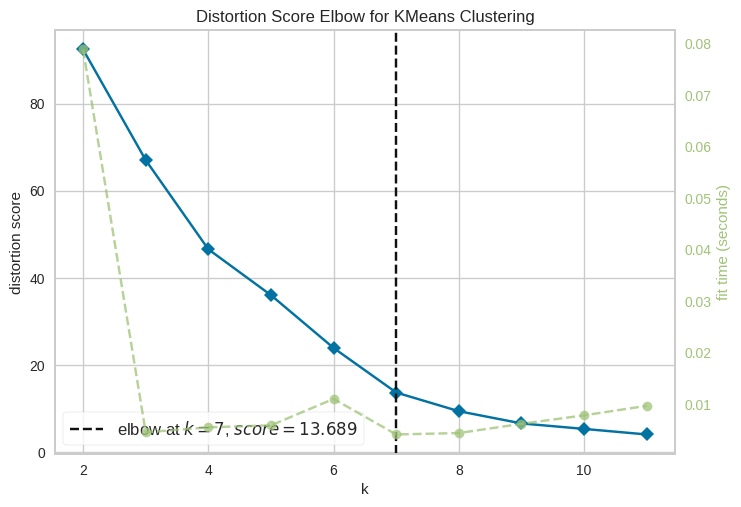

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'No. of Operational PCS']])

# Create a KMeans model
model = KMeans(random_state=42, n_init='auto')

# Use the KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(2,12))

# Fit the data to the visualizer
visualizer.fit(X_scaled)

# Render the plot
visualizer.show()


>Max Cluster or `Optimal number of Segments is found as 7`.

###Principle Component Analysis
> The loadings indicate how the original variables are combined to form principal
components and guide the interpretation of principal components.

In [ ]:
X = df1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'No. of Operational PCS']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
from sklearn.cluster import KMeans # Import KMeans
kmeans = KMeans(n_clusters=7, random_state=42) # You can adjust the number of clusters as needed
clusters = kmeans.fit_predict(X_pca) # Generate cluster assignments

# Create a DataFrame for PCA results
pca_df1 = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df1['Cluster'] = clusters

# Output the loadings for reference
# Get PCA components (loadings)
components = pca.components_.T
loadings_df1 = pd.DataFrame(components, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print("PCA Loadings:")
loadings_df1

PCA Loadings:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4
Two Wheeler,0.630455,-0.120956,0.253475,0.723634
Three Wheeler,0.277604,0.854605,-0.435566,0.053560
Four Wheeler,0.398346,-0.500962,-0.749715,-0.168178
No. of Operational PCS,0.605626,0.063689,0.428905,-0.667234


* PC1: This component explains the most variance in the data. It has high positive loadings for "Two Wheeler" and "No. of Operational PCS," suggesting that these variables are highly correlated and contribute significantly to the first principal component.
* PC2: This component captures the second most variance. It has a high positive loading for "Three Wheeler" and a high negative loading for "Four Wheeler," indicating a strong correlation between these variables but in opposite directions.

##Segment Seperation Plot using PCA and K-Means

<ipython-input-22-d5d2ebb9cb26>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings_df1['PC1'][i]*2, loadings_df1['PC2'][i]*2, color='r', alpha=0.5, head_width=0.03, head_length=0.05)
<ipython-input-22-d5d2ebb9cb26>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings_df1['PC1'][i]*3, loadings_df1['PC2'][i]*3, feature, color='black', ha='center', va='center', fontsize=12)


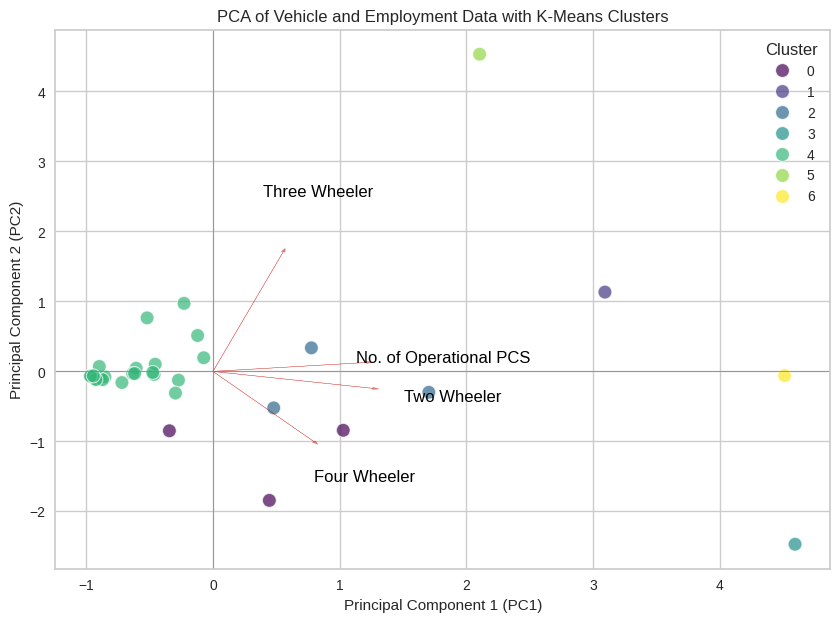

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 7))

# Scatter plot of PC1 vs PC2, colored by the K-Means cluster assignments
sns.scatterplot(x=pca_df1['PC1'], y=pca_df1['PC2'], hue=pca_df1['Cluster'], palette='viridis', s=100, alpha=0.7)

# Add the PCA loadings as arrows
for i, feature in enumerate(loadings_df1.index):
    plt.arrow(0, 0, loadings_df1['PC1'][i]*2, loadings_df1['PC2'][i]*2, color='r', alpha=0.5, head_width=0.03, head_length=0.05)
    plt.text(loadings_df1['PC1'][i]*3, loadings_df1['PC2'][i]*3, feature, color='black', ha='center', va='center', fontsize=12)

# Set labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Vehicle and Employment Data with K-Means Clusters')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

# Show the plot
plt.show()


* PC1: The "Two Wheeler" and "No. of Operational PCS" variables are positively correlated with PC1, suggesting that states with higher numbers of two-wheelers and operational PCS tend to be grouped together.
* PC2: The "Three Wheeler" variable is positively correlated with PC2, while "Four Wheeler" is negatively correlated. This indicates a trade-off between these two vehicle types. States with higher numbers of three-wheelers might have lower numbers of four-wheelers and vice versa.
* Cluster Distribution: The clusters appear to be somewhat separated along PC1, suggesting that there might be differences in the distribution of two-wheelers and operational PCS across the clusters. The distribution along PC2 might indicate variations in the balance between three-wheelers and four-wheelers.

---
##Segment profiling and Selecting the optimal Segment

In [ ]:
df1['Segment'] = clusters

# Group the data by cluster and calculate average values
# Exclude the 'State Name' column from the mean calculation
cluster_profiles = df1.drop('State Name', axis=1).groupby('Segment').mean()

# Print the cluster profiles
cluster_profiles


,Two Wheeler,Three Wheeler,Four Wheeler,No. of Operational PCS
Segment,,,,
0,3437.333333,705.000000,3474.000000,284.666667
1,14730.000000,112831.000000,3051.000000,1886.000000
2,27136.666667,11990.000000,444.666667,539.666667
3,56737.000000,16478.000000,7212.000000,1041.000000
4,1848.481481,8017.703704,146.148148,114.259259
5,18295.000000,257159.000000,368.000000,582.000000
6,51149.000000,6155.000000,2.000000,3079.000000


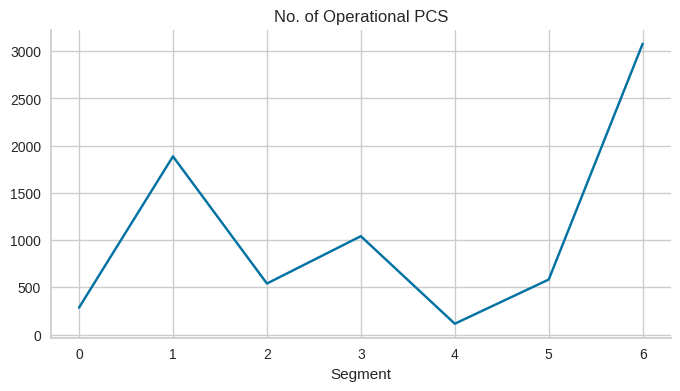

In [ ]:
cluster_profiles['No. of Operational PCS'].plot(kind='line', figsize=(8, 4), title='No. of Operational PCS')
plt.gca().spines[['top', 'right']].set_visible(False)

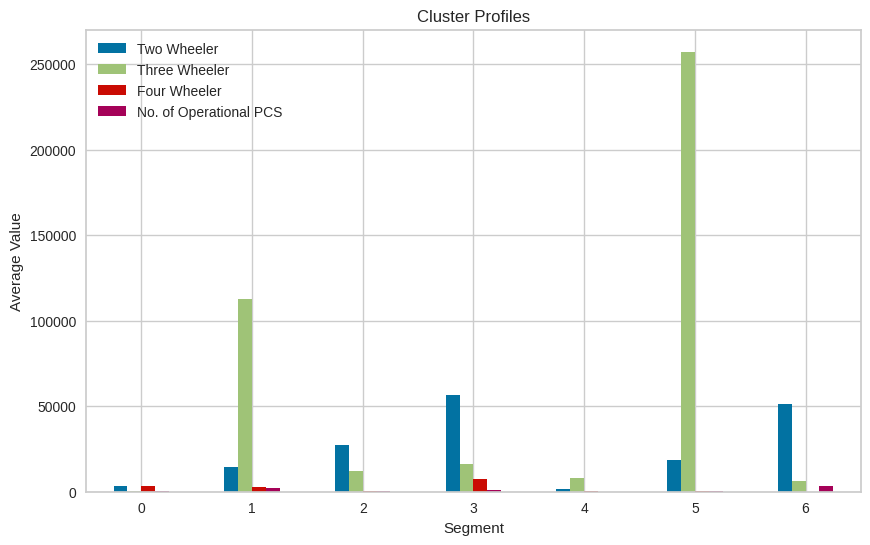

In [ ]:

df1['Cluster'] = clusters

# Visualize the cluster profiles
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles')
plt.xlabel('Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()


In [ ]:
# Create a DataFrame to display states in each segment
segment_states = df1.groupby('Segment')['State Name'].apply(list).reset_index(name='States')

# Display the table
segment_states


,Segment,States
0,0,"[Kerala, Ladakh, Sikkim]"
1,1,[Delhi]
2,2,"[Gujarat, Rajasthan, Tamil Nadu]"
3,3,[Karnataka]
4,4,"[Andaman and Nicobar Island, Arunachal Pradesh..."
5,5,[Uttar Pradesh]
6,6,[Maharashtra]


#Observations:


---
>Segment 0 `(Kerala, Ladakh, Sikkim)`

- Vehicle Distribution: A relatively balanced distribution of two-wheelers and four-wheelers, with a very small number of three-wheelers.
- PCS: A moderate number of PCS, suggesting a developing infrastructure for electric vehicles.
---
>Segment 1 `(Delhi)`

- Vehicle Distribution: A high number of two-wheelers, with a very small number of three-wheelers and four-wheelers. This indicates a strong preference for two-wheelers in this region.
- PCS: A good number of PCS, suggesting a well developed infrastructure development to support electric vehicles.
---
>Segment 2 `(Gujarat, Rajasthan, Tamil Nadu)`

- Vehicle Distribution: A high number of four-wheelers, with a moderate number of two-wheelers and three-wheelers.
- PCS: A very high number of PCS, indicating a well-developed infrastructure for electric vehicles.
---
>Segment 3 `(Karnataka)`

- Vehicle Distribution: A balanced distribution of two-wheelers and three-wheelers, with a moderate number of four-wheelers.
- PCS: A high number of PCS, suggesting a strong focus on electric vehicle infrastructure.
---
>Segment 4 `(Andaman & Nicobar Island, Arunachal Pradesh, Assam, Bihar, Chandigarh, Chhattisgarh, Goa, Haryana, Himachal Pradesh, Jammu & Kashmir, Jharkhand, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Puducherry, Punjab, Tripura, Dadra & Nagar Haveli and Daman & Diu, Uttarakhand, West Bengal, Andhra Pradesh, Lakshadweep, Madhya Pradesh, Pondicherry, Telangana)`

- Vehicle Distribution: A high number of two-wheelers, with a moderate number of three-wheelers and four-wheelers.
- PCS: A moderate number of PCS, indicating a developing infrastructure for electric vehicles.
---
>Segment 5 `(Uttar Pradesh)`

- Vehicle Distribution: A very high number of two-wheelers, with a small number of three-wheelers and four-wheelers.
- PCS: A moderate number of PCS, suggesting a growing infrastructure for electric vehicles.
---
>Segment 6 `(Maharashtra)`

- Vehicle Distribution: A balanced distribution of two-wheelers, three-wheelers, and four-wheelers.
- PCS: A very high number of PCS, indicating a well-developed infrastructure for electric vehicles.
Key Observations
---

> * Regional Preferences: Some regions show a strong preference for two-wheelers (e.g., Delhi, Uttar Pradesh), while others have a more balanced distribution (e.g., Maharashtra, Karnataka).
* Infrastructure Development: The number of PCS varies significantly across segments, highlighting the uneven development of electric vehicle infrastructure in different regions.
* Geographic Factors: The geographic location of the segments likely influences the vehicle distribution and infrastructure development. For example, regions with dense urban areas may have a higher demand for two-wheelers and more developed charging infrastructure.

#Selecting (the) Target Segment(s)

### The best segments to consider for Geographi Segmentation would be `Segment 1 , 3 and 6`

* `Segment 3` with  a  high number of PCS, suggesting a strong focus on electric vehicle infrastructure.
* `Segment 6`  with a very high number of PCS, indicating a well-developed infrastructure for electric vehicles.
* `Segment 1` with a good number of PCS, suggesting a well developed infrastructure development to support electric vehicles